# Week 3 SA

Hey Everyone!!
We hope that you are excited to apply your newly acquired knowledge and test it on this notebook.
In this assignment, we will be walking through creating an email classifier based the content the mail has.

## About the data

The data "email.csv" has a few rows and about 3K columns including <b>Email_no.</b> and <b>spam</b>. <br>
Email_no. is like a unique id for an email and spam denotes whether the given mail is a spam or not (0 = not spam, 1 = spam)<br>
Rest of the columns are words in english with the values being equal to the frequency of that word in the email.
<br>Our goal is to predict whether the given mail is spam or not

## Importing useful libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data
### If you are using Datalore, you may use the csv file directly. Otherwise you may download it from <a href = "https://drive.google.com/file/d/1OxJ6SSuPypg-AfLbMRl0O9So9aDDNzbC/view?usp=sharing">this link</a>

In [2]:
df = pd.read_csv('emails.csv')

## Describe the data and generate some basic insights unsing methods like .info

In [3]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Looking at the data

In [157]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,...,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000
mean,6.187578,5.819434,5.670674,2.803156,3.034811,2.416479,52.697721,2.362635,2.282244,9.836714,...,0.006513,0.006764,0.010772,0.088677,0.004509,0.007766,0.004509,0.921343,0.006012,0.285321
std,11.087831,9.125390,15.763247,5.656263,4.558739,5.773931,84.037752,4.341131,7.780057,18.145921,...,0.120376,0.117197,0.116897,0.544352,0.102486,0.155706,0.077416,2.979312,0.094785,0.451624
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,11.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,27.000000,1.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,7.000000,4.000000,3.000000,4.000000,2.000000,59.000000,3.000000,1.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,44.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,5.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


## Figuring out some comparatively more important features

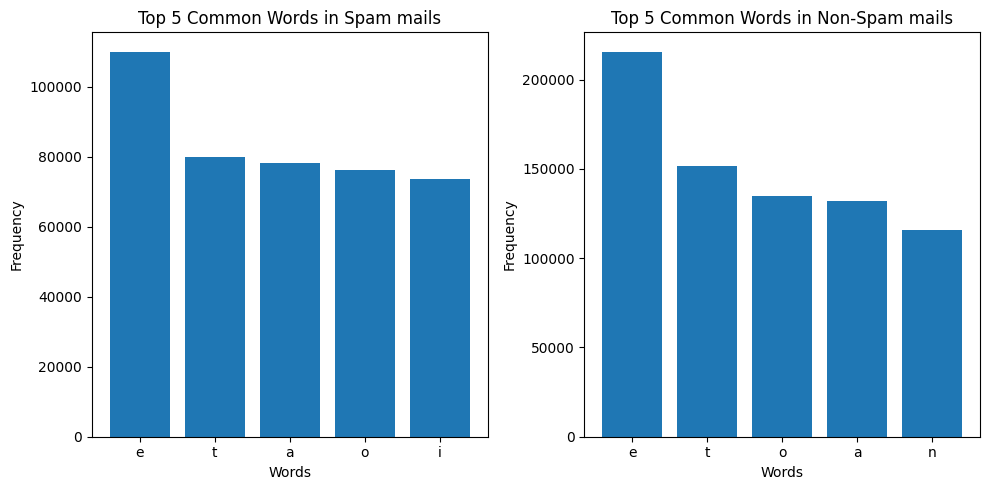

In [17]:
# Plot histogram to visualize the top 5 common words in spam mail and non-spam mails seperately.
df_spam = df[df.Prediction==1]
df_non_spam = df[df.Prediction==0]
#top words
data_spam = df_spam.iloc[:, 1:].sum().nlargest(5)
data_non_spam = df_non_spam.iloc[:, 1:].sum().nlargest(5)



plt.figure(figsize=(10, 5))
# spam words plot
plt.subplot(1, 2, 1)
plt.bar(data_spam.index, data_spam.values)
plt.title("Top 5 Common Words in Spam mails")
plt.xlabel("Words")
plt.ylabel("Frequency")


# non spam words plot
plt.subplot(1, 2, 2)
plt.bar(data_non_spam.index, data_non_spam.values)
plt.title("Top 5 Common Words in Non-Spam mails")
plt.xlabel("Words")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [18]:
# There are 3K rows given in this dataset, can you think of some method to reduce the number of columns in the dataset?
# Try taking only top 1.5K that will comprise of some of the most "deciding factors"
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,...,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000
mean,6.187578,5.819434,5.670674,2.803156,3.034811,2.416479,52.697721,2.362635,2.282244,9.836714,...,0.006513,0.006764,0.010772,0.088677,0.004509,0.007766,0.004509,0.921343,0.006012,0.285321
std,11.087831,9.125390,15.763247,5.656263,4.558739,5.773931,84.037752,4.341131,7.780057,18.145921,...,0.120376,0.117197,0.116897,0.544352,0.102486,0.155706,0.077416,2.979312,0.094785,0.451624
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,11.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,27.000000,1.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,7.000000,4.000000,3.000000,4.000000,2.000000,59.000000,3.000000,1.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,44.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,5.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [27]:
# df2 = df.drop(['Email No.'], axis=1)
# df3 = df2.mean().sor
# # df2
# # for i in df3:
# #   if df3[i] > 0.02 :
# #     df2.drop([i], axis=1, inplace=True)
# df.shape
# # # df['the'].mean()

In [72]:
# removing prediction column
df2 = df.iloc[:, :-1].copy()

# seperating top 1.5K cols
top_features = df2.sum().sort_values(ascending = False).index[:1500]
df_reduced = df[['Prediction'] + list(top_features)]

# Handling null values
df2 = df_reduced.fillna(0)
df2.isnull().sum()
# df_reduced[df_reduced.isnull()]


Prediction      0
e               0
t               0
o               0
a               0
               ..
additionally    0
beck            0
chance          0
browser         0
louis           0
Length: 1501, dtype: int64

In [158]:
df2

,Prediction,e,t,o,a,n,r,i,s,l,...,moopid,status,hotlist,according,foot,additionally,beck,chance,browser,louis
0,0.0,4,4,0,2,0,4,2,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,141,91,131,102,70,122,61,95,35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,3,3,5,8,8,0,8,2,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,79,49,48,51,23,46,16,36,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,71,63,58,57,42,41,30,19,34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3988,0.0,25,25,17,33,28,6,24,15,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3989,1.0,243,176,194,132,143,142,163,131,103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3990,0.0,46,27,24,26,23,22,28,14,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3991,0.0,99,57,61,67,55,66,37,17,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train - Test Split

In [135]:
# Create trianing and testing data
# train_data= df.drop(['Prediction'], axis=1)
X = df2.iloc[:, 1:]
y = df2.iloc[:, 0]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Making Predictions using Multinomial NB Classifier

In [136]:
# Feed the train data into multinomial naive bias classifier
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [151]:
# Check the model's accuracy of test data and plot the ROC-AUC curve

# Accuracy score
model.score(X_test, y_test)

0.9499165275459098

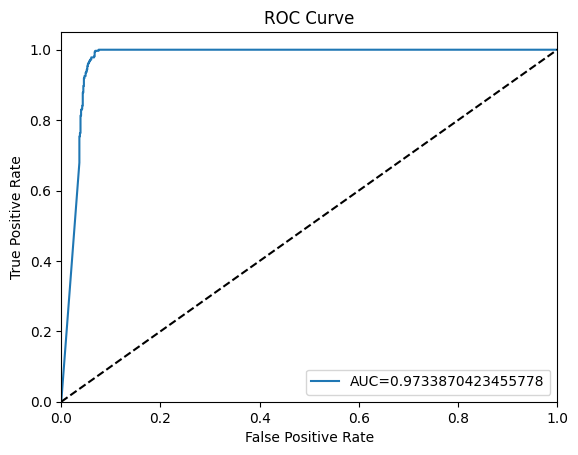

In [138]:
from sklearn import metrics
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.figure()
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# plt.legend(loc=4)
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


## Plot the confusion Matrix

In [149]:
# Print Confusion Matrix using any 5 words of your choice with the column 'spam'

y_pred = model.predict(X_test)

In [142]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
cf

array([[830,  47],
       [ 13, 308]])

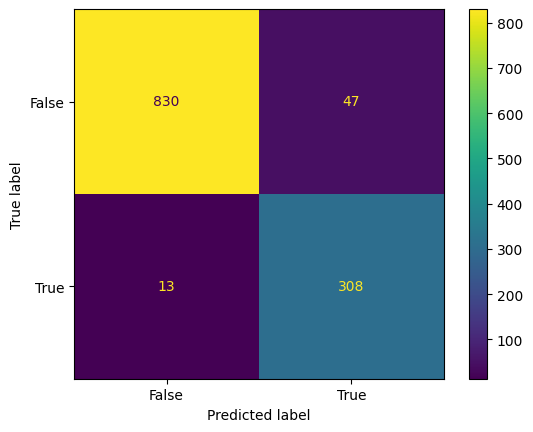

In [152]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [False, True])
cm_display.plot()
plt.show()

In [144]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97       877
         1.0       0.87      0.96      0.91       321

    accuracy                           0.95      1198
   macro avg       0.93      0.95      0.94      1198
weighted avg       0.95      0.95      0.95      1198



## Trying out with SVMs

In [145]:
# Try using Support Vector Classifier (SVC) from scikit-learn
# Apply similar processes as above through SVC i.e., Make prediction, check accuacy and plot confusion matrix

from sklearn.svm import SVC
svc_model = SVC(kernel = 'linear',gamma = 'scale', shrinking = False,)
svc_model.fit(X_train, y_train)

SVC(kernel='linear', shrinking=False)

In [146]:
# Prediction
y_pred2 = svc_model.predict(X_test)

In [147]:
# Accuracy Score
svc_model.score(X_test, y_test)

0.9532554257095158

In [156]:
# Confusion Matrix
cf2 = confusion_matrix(y_test, y_pred2)

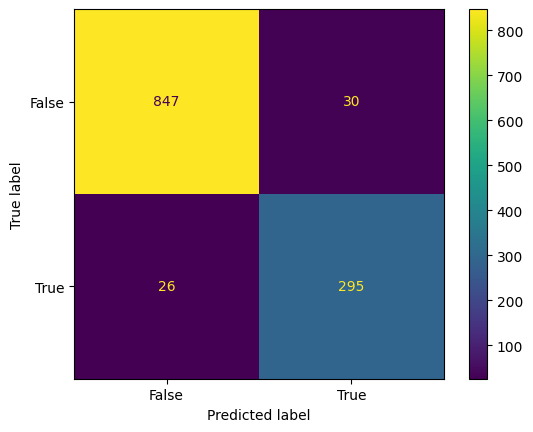

In [155]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf2, display_labels = [False, True])
cm_display.plot()
plt.show()

## Comparing the models

In [120]:
# Which model performed better?
# Can you suggest some reason for better performance of one model over the other?

# Linear SVC model performed better than Naive Bayes Model because it has more accuracy score.

## Bonus Question

In [121]:
# Given a string. Try to create the dataset having each word of dataset as column and row values as the frequency of that word.
# For example
# s = "I am a Python developer and currently working on a project to classify mails"
# dataframe = {"I" : 1,
#              "am" :1,
#              "a" : 2,
#               ...}

In [192]:
import string
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [195]:
st = "I am a Python developer and currently working on a project to classify mails"
# corpus = nltk.sent_tokenize(s)
wordfreq = {}
tokens = nltk.word_tokenize(st)
for token in tokens:
      if token not in wordfreq.keys():
          wordfreq[token] = 1
      else:
          wordfreq[token] += 1
df3 = pd.DataFrame(wordfreq, index=[0])
df3
# wordfreq

,I,am,a,Python,developer,and,currently,working,on,project,to,classify,mails
0,1,1,2,1,1,1,1,1,1,1,1,1,1


In [197]:
# from sklearn.feature_extraction.text import CountVectorizer

# s = ["I am a Python developer and currently working on a project to classify mails"]

# count_vect = CountVectorizer(min_df=1)
# count_matrix = count_vect.fit_transform(s)
# count_array = count_matrix.toarray()
# df3 = pd.DataFrame(data=count_array, columns = count_vect.get_feature_names_out())
# df3